# FIT9136 Algorithms and programming foundations in Python 

# Week 9 Lab Activities: File Manipulation, Testing And Exception Handling, Python Library And Packages

<small>#libraries #re #matplotlib #numpy #pandas</small>

Have you ever wanted to implement some algorithms, <font size='4em' color='red'><b>BUT</b></font> they are too difficult to understand, if not impossible to write the code?

![Frustrated Programmer Gif from Google](https://miro.medium.com/max/400/0*vqNh5KmPN5C8Uio9.gif)

<small>(It is not advised to hit the keyboard by your head, or any other way to hurt yourself.)</small>

With different Python libraries developed by a large group of great developers, our lives have become much easier because we can simply plug in and use the codes written by them to achieve the things we want to do.

In this lab, we are going to explore several commonly used Python libraries:
1. re
2. pandas
3. matplotlib
4. numpy

## 1. re

<blockquote>
This module provides regular expression matching operations ... -<a href='https://docs.python.org/3/library/re.html'>Python 3 Docs</a>
</blockquote>

So, now we know we need to import **`re`** library in order to use regular expressions. 

In [1]:
import re # import re library

### 1.1 Commonly used methods

#### **A.** `re.search(pattern, string, flags=0)`

<blockquote>
Scan through string looking for the <b>first</b> location where the regular expression pattern produces a match, and return a corresponding match object. -Python 3 Doc
</blockquote>

In [ ]:
?re.search

In [1]:
# searching 'abc' from '1234abc5678derg abc'
search_string = '1234abc5678derg abc'
pattern = 'abc'

result = re.search(pattern, search_string)

print("result:", result)
print("result.span():", result.span())
print("search_string[result.span()[0]: result.span()[1]] => search_string[4:7]:", search_string[result.span()[0]: result.span()[1]]) # the index location of 'abc' is from 4(inclusive) to 7(exclusive)

NameError: ignored

In [ ]:
# searching '2bc' from '1234abc5678derg'
search_string = '1234abc5678derg'
pattern = '2bc'

result = re.search(pattern, search_string)
print("result:", result) # if pattern not found, None is returned from re.search

#### **B.** `re.findall(pattern, string, flags=0)`
<blockquote>
Return all <b>non-overlapping matches</b> of pattern in string, as a list of strings or tuples. -Python 3 Doc
</blockquote>

In [ ]:
?re.findall

In [ ]:
search_string = '1234abc5678 dergabc 30374 abcr3g'
pattern = 'abc'

result = re.findall(pattern, search_string)
print(result) # all 'abc's found in search_string as a list

#### **C.** `re.sub(pattern, repl, string, count=0, flags=0)`

<blockquote>
Return the string obtained by replacing the <b>leftmost non-overlapping occurrences</b> of pattern in string by the replacement repl. If the pattern isn’t found, string is returned unchanged. -Python 3 Doc
</blockquote>

In [ ]:
?re.sub

In [2]:
search_string = '1234abc5678 dergabc 30374 abcr3g'

pattern = 'abc'
repl = '   '

result = re.sub(pattern, repl, search_string)
print(result) # the replaced string

1234   5678 derg    30374    r3g


### 1.2 Regular Expressions

Now we know some of the methods implemented in the re library. However, what actually are regular expressions?

<blockquote>
A regular expression (shortened as regex or regexp...) is a sequence of characters that specifies a search pattern. - Wikipedia
</blockquote>

Some useful tools to test/visualise the regex:
1. [regex101](https://regex101.com/): a webapp to test your regex
2. [Regexper](https://regexper.com/): regex visualisation tool

#### <b>A. Basic Syntax: A query string</b>

- e.g.: `r"abc"` if we want to search "abc" (Simply the string you want to search after you press *ctrl+F* or *Command+F*)

<font color='red'><b>Question:</b></font> What does the `r` before the quote specify?

In [3]:
str1 = "abc\n"
print(str1)

abc



In [4]:
str2 = r"abc\n"
print(str2)

abc\n


<font color='red'><b>Answer:</b></font> `r` refers to **raw string**. 

From the example above, the `\n` is preserved in raw string. However, it becomes a new line in normal string.

#### <b>B. (Some) Special characters in regex</b>



##### **B1.** `.` (Dot.): Wildcard. Can be any character except newline characters.

In [ ]:
search_string = '11 1. Rand0M $trinG'

pattern = r'1.'

result = re.search(pattern, search_string)
print(result)

<font color='red'><b>Question:</b></font> What if we want to search '1.' from "11 1. Rand0M $trinG" literally?</font>

In [ ]:
search_string = '11 1. Rand0M $trinG'

pattern = r'1\.' # put a \ before . to escape wildcard, same applies to escape all other special characters in regex

result = re.search(pattern, search_string)
print(result)

##### **B2.** `*`: Causes the resulting RE to match 0 or more repetitions of the preceding RE, as many repetitions as are possible. 

e.g. `r"ab*"` will match ‘a’, ‘ab’, or ‘a’ followed by any number of ‘b’s.

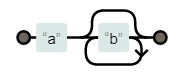

In [ ]:
search_string = '11 1. Rand0M $trinG'

pattern = r'.*' # searching for strings with 0 or more characters

result = re.findall(pattern, search_string)
print(result)

##### **B3.** `*?`: The '\*' qualifier is *greedy*; it matches as much text as possible.

Adding `?` after the `*` makes it *lazy*; as few characters as possible will be matched.

In [ ]:
search_string = '11 1. Rand0M $trinG Rand0M $trinG'

pattern1 = r'R.*M' # greedy
result1 = re.search(pattern1, search_string)

pattern2 = r'R.*?M' # lazy
result2 = re.search(pattern2, search_string)

print(result1, result2)

<font color='red'><b>Task:</b></font> Write a code to replace all emojis(starting with `"("` and ending with `")"`) with `"[emoji]"` in the following text record.

In [ ]:
text_rec = """
A: Congratulations!(＾∇＾)(｡ì _ í｡) You've won a $1,000 Walmart gift card. Go to http://bit.ly/d3FJe1 to claim now.
B: I am good. Nice try!(^_^)
C: Your tax refund is pending acceptance.(>.<) Must accept within 24 hours: http://bit.ly/fIhE3W16432
B: Why is everyone trying to scam me!! (///▽///)
"""

pattern = r"\(.*?\)" # search for characters after each '(' until reaching the first ')'
repl = '[emoji]'

result = re.sub(pattern, repl, text_rec)
print(result)

## 2. Pandas

<blockquote>
pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. - <a href='https://pandas.pydata.org/docs/index.html'>Pandas official site</a>
</blockquote>

In [1]:
import pandas as pd

### 2.1 Create a pandas DataFrame

There are several ways to create a pandas DataFrame.

#### A. Read from tabular data files

1. Tab-separated values(TSV)
    
    `read_table()`

In [2]:
df_tsv = pd.read_table('FlyRNAi_data_baseline_vs_EGF.txt')
df_tsv.head() # inspecting the first 5 rows of the DataFrame

FileNotFoundError: [Errno 2] No such file or directory: 'FlyRNAi_data_baseline_vs_EGF.txt'

2. Comma-separated values(CSV)

    `read_csv()`

<font color='red'><b>Task</b></font>: Try to create a DataFrame instance `df_csv` from cities.csv file.

In [3]:
df_csv = pd.read_csv('cities.csv')
df_csv.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cities.csv'

3. JSON (JavaScript Object Notation)

    <small>(although this might not be the best idea)</small>

    `read_json()`

In [ ]:
df_json = pd.read_json('/content/drive/Shareddrives/FIT9136 Tutor Support/Weekly Teaching Materials/Week 9/Lab/webapp.json')
df_json.head()

#### B. Create a new DataFrame instance directly

In [7]:
data = [(ord(char),char) for char in 'abacabcbacbacbacbabcacbbacbabcab'] # creating a list of tuples: [(ascii code, alphabet)]

df_list_of_tuple = pd.DataFrame(data,columns=['ascii_code','alphabet']) # specify the column names
df_list_of_tuple.head()

,ascii_code,alphabet
0,97,a
1,98,b
2,97,a
3,99,c
4,97,a


In [10]:
data = {'ascii_code': [ord(char) for char in 'abacabcabcbacbacbabcacbbaccabacb'], 
        'alphabet': list('abacabcbacbacbacbabcacbbacbabcab')} # creating a dictionary where keys are the keys and the values are items

df_dict_of_list = pd.DataFrame(data)
df_dict_of_list.head()

,ascii_code,alphabet
0,97,a
1,98,b
2,97,a
3,99,c
4,97,a


### 2.2 Basic Operations of DataFrame

There are countless of operations of DataFrame. 

In this part, we will explore some of the methods by doing a task.

<font color='red'><b>Task:</b></font> We want to: 
1. count the number of occurrence of each unique (ascii_code, alphabet) pairs in `df_dict_of_list` DataFrame and 
2. create a bar chart from it. 

The y-axis will be the count of the (ascii_code, alphabet) pairs, x-axis will be (ascii_code, alphabet) pairs and the bars of different alphabets will have different colors.

Step 1: Use [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) method to obtain a Series counts based on the number of occurence of each (ascii_code, alphabet) pairs.

In [9]:
counts = df_dict_of_list.value_counts()
counts

ascii_code  alphabet
98          b           10
97          a            9
99          c            8
            b            1
            a            1
98          a            1
97          c            1
            b            1
dtype: int64

Step 2: Convert the Series to DataFrame by [`to_frame()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html?highlight=to_frame) method.

In [11]:
counts_df = counts.to_frame()
counts_df

0
ascii_code alphabet    
98         b         10
97         a          9
99         c          8
           b          1
           a          1
98         a          1
97         c          1
           b          1

Step 3: Now, the dataframe is indexed by ascii_code and alphabet. We can reset the index by [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index#pandas.DataFrame.reset_index).

In [12]:
counts_df.reset_index(inplace=True) # why inplace=True? what will happen if inplace is not specified?
counts_df

,ascii_code,alphabet,0
0,98,b,10
1,97,a,9
2,99,c,8
3,99,b,1
4,99,a,1
5,98,a,1
6,97,c,1
7,97,b,1


Step 4: We can set the third column as 'count' instead.

<small>https://stackoverflow.com/a/11346337</small>

In [13]:
counts_df.columns = ['ascii_code','alphabet','count']
counts_df

,ascii_code,alphabet,count
0,98,b,10
1,97,a,9
2,99,c,8
3,99,b,1
4,99,a,1
5,98,a,1
6,97,c,1
7,97,b,1


Step 5: We can create a new column called '(ascii_code,alphabet)' and the value will be in '({ascii_code},{alphabet})' format. This can be done by [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html?highlight=apply#pandas.DataFrame.apply) method.

In [14]:
def concat_col(x):
    return f"({x['ascii_code']},{x['alphabet']})"
counts_df['(ascii_code,alphabet)'] = counts_df.apply(concat_col,axis = 1)

# or
# counts_df['(ascii_code,alphabet)'] = counts_df.apply(lambda x:f"({x['ascii_code']},{x['alphabet']})",axis = 1)
counts_df

,ascii_code,alphabet,count,"(ascii_code,alphabet)"
0,98,b,10,"(98,b)"
1,97,a,9,"(97,a)"
2,99,c,8,"(99,c)"
3,99,b,1,"(99,b)"
4,99,a,1,"(99,a)"
5,98,a,1,"(98,a)"
6,97,c,1,"(97,c)"
7,97,b,1,"(97,b)"


Step 6: We can further create a new column called 'color'. The value of this column is determined by the values of alphabet in that row. If alphabet is 'a', color will be 'r'; if alphabet is 'b', color will be 'g'; alphabet is 'c', color will be 'b'.

In [15]:
color_dict = dict(zip('abc','rgb'))
counts_df['color'] = counts_df.apply(lambda x: color_dict[x['alphabet']], axis = 1)

counts_df

,ascii_code,alphabet,count,"(ascii_code,alphabet)",color
0,98,b,10,"(98,b)",g
1,97,a,9,"(97,a)",r
2,99,c,8,"(99,c)",b
3,99,b,1,"(99,b)",g
4,99,a,1,"(99,a)",r
5,98,a,1,"(98,a)",r
6,97,c,1,"(97,c)",b
7,97,b,1,"(97,b)",g


Step 7: Plot the graph with [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) method.

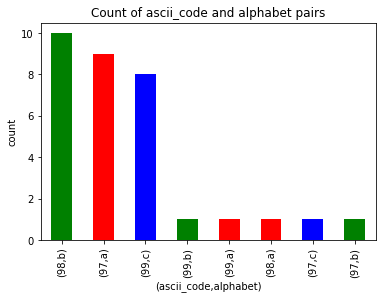

In [16]:
counts_df.plot(kind='bar',x='(ascii_code,alphabet)', y='count',color=counts_df['color'],legend=False,ylabel='count',title='Count of ascii_code and alphabet pairs')

## 3. matplotlib and numpy

<blockquote>
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. - <a href='https://matplotlib.org/stable/index.html'>Matplotlib official site</a>
</blockquote>

<blockquote>
The fundamental package for scientific computing with Python - <a href='https://numpy.org/'>Numpy official site</a>
</blockquote>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<font color='red'><b>Task:</b></font> Using matplotlib and numpy, create a scatterplot for the following functions over a range of -10 to 10 (for a challenge, plot them in the same window):
- y = x+2
- y = x^2
- y = x^3

1. Plot the 3 x-y relationships on the same graph
2. Plot them on separate subplots

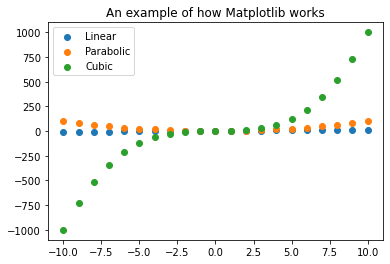

In [2]:
# normally how we do it
# x = [x for x in range(-10,11)]
# linear = [l + 2 for l in x]
# para = [p**2 for p in x]
# cubic = [c**3 for c in x]

# with numpy array
# create an array of integers for x from -10 to 10
x = np.array([x for x in range(-10,11)])
# create the arrays for different y values according to the equations
linear = x+2
para = x**2
cubic = x**3

#this could easily be done using plot rather than scatter
plt.scatter(x,linear,label="Linear")
plt.scatter(x,para,label="Parabolic")
plt.scatter(x,cubic,label="Cubic")
plt.legend()
plt.title("An example of how Matplotlib works")

plt.show()

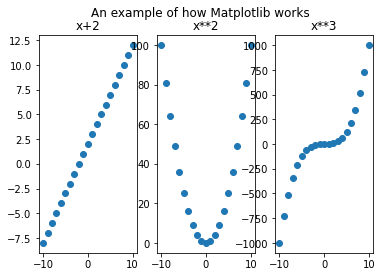

In [19]:
x = np.array([x for x in range(-10,11)])
linear = x+2
para = x**2
cubic = x**3

# create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1,3)
axes[0].scatter(x,linear,label="Linear")
axes[0].set_title('x+2')

axes[1].scatter(x,para,label="Parabolic")
axes[1].set_title('x**2')

axes[2].scatter(x,cubic,label="Cubic")
axes[2].set_title('x**3')


fig.suptitle("An example of how Matplotlib works")



plt.show()

## 4. Small Summary

We have explored several useful libraries of Python in this week. 

At the start, it might be tempting to use libraries to solve every tasks that we have. However, before we use the libraries, it is always worth thinking: "Is this library really making my life easier in this task? "

There will be no exercises this week. Have fun in assignment 2!